Chapter 07

# 高斯过程，分类
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import seaborn as sns

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

In [3]:
# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max  = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max  = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), 
                     np.linspace(y_min, y_max, 400))

C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


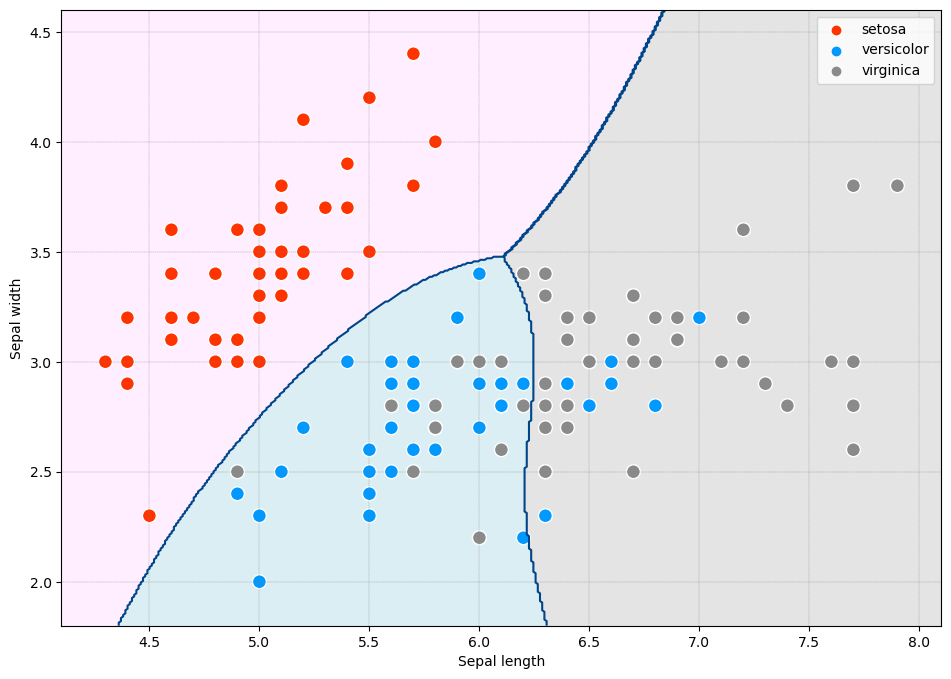

In [4]:
fig, ax = plt.subplots(figsize = (12,8))

q = np.c_[xx.ravel(), yy.ravel()];

# predicted labels
Z = gpc_rbf_isotropic.predict(q)

y_predict = Z.reshape(xx.shape)

# plot decision regions
plt.contourf(xx, yy, y_predict, cmap=cmap_light)

# plot decision boundaries
plt.contour(xx, yy, y_predict, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, 
                linewidth = 1, edgecolor=[1,1,1],
                s=100)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.axis('scaled')
plt.show()

In [5]:
#%% plot probability 3D mesh and contour maps

predict_proba = gpc_rbf_isotropic.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predict_proba = predict_proba.reshape((xx.shape[0], xx.shape[1], 3))

labels = ['setosa', 'versicolor', 'virginica']

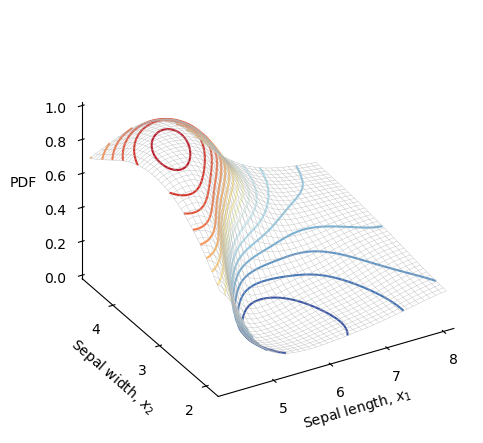

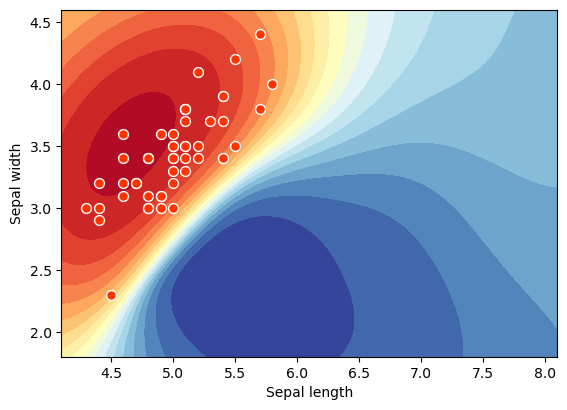

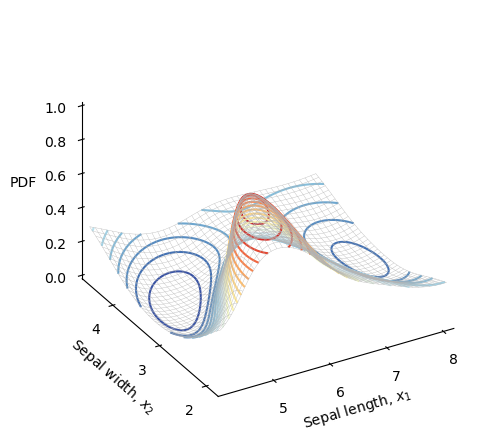

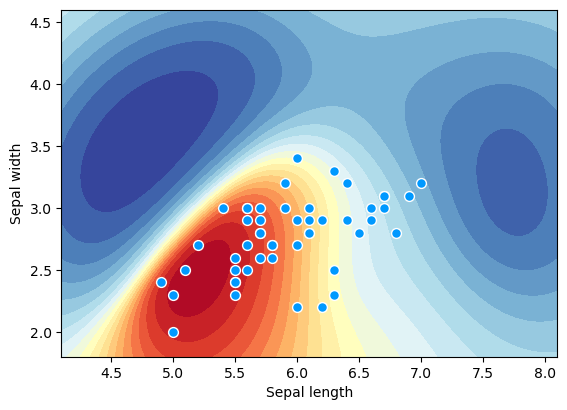

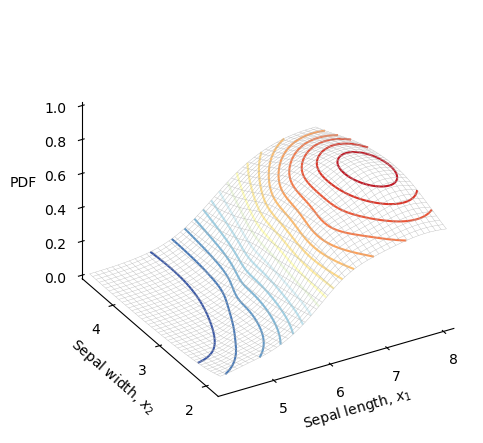

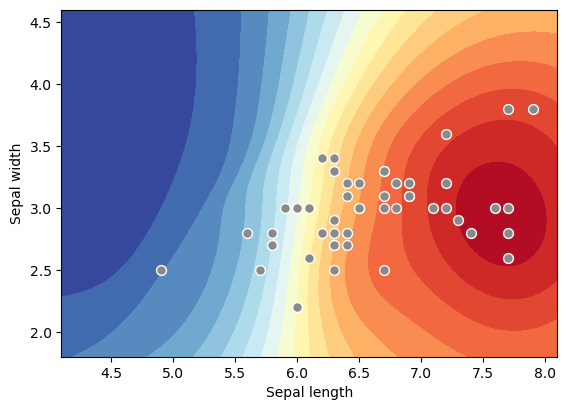

In [6]:
for idx, label_idx, color_idx in zip(range(3), labels, cmap_bold):
    
    mask = (iris.target_names[y] == label_idx)
    Z = predict_proba[:,:,idx]
    
    fig = plt.figure(figsize=(12, 8))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    
    ax.plot_wireframe(xx, yy, Z,
                      color = [0.7,0.7,0.7],
                      linewidth = 0.25,
                      rstride = 10,
                      cstride = 10)
    
    ax.contour3D(xx, yy, Z,20,
                 cmap = 'RdYlBu_r')
    
    ax.set_proj_type('ortho')
    
    ax.set_xlabel('Sepal length, $x_1$')
    ax.set_ylabel('Sepal width, $x_2$')
    ax.set_zlabel('PDF')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_xticks([4,5,6,7,8])
    ax.set_yticks([1,2,3,4,5])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_zlim3d([0,1])
    ax.view_init(azim=-120, elev=30)
    ax.grid(False)
    plt.show()
    
    ax = fig.add_subplot(1, 2, 2)
    
    plt.contourf(xx, yy, Z, cmap='RdYlBu_r', levels = 20)
    
    sns.scatterplot(x=X[mask, 0], y=X[mask, 1], alpha=1.0, 
                    linewidth = 1, edgecolor=[1,1,1],
                    facecolor = color_idx,
                    s = 50)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    # plt.tight_layout()
    plt.axis('scaled')
    plt.show()
    